# **开源软件开发与社区治理 期末作业**

- **成员： 周逸平（51215903101） 刘新新（51215903085） 袁梦逸（51215903093）**
- **分析项目： kubernetes/kubernetes（20580498）**
- **分析时间段： 2015年 - 2021年**

---

### **1. 每月新增Star和Fork的个数**

┌─────────┬──────────────┬──────────────────┬──────────────────┐
│ (index) │     月份     │ 每月新增star个数 │ 每月新增fork个数 │
├─────────┼──────────────┼──────────────────┼──────────────────┤
│    0    │ '2015年1月'  │      '434'       │      '152'       │
│    1    │ '2015年2月'  │      '418'       │      '158'       │
│    2    │ '2015年3月'  │      '498'       │      '222'       │
│    3    │ '2015年4月'  │      '638'       │      '221'       │
│    4    │ '2015年5月'  │      '622'       │      '231'       │
│    5    │ '2015年6月'  │      '714'       │      '265'       │
│    6    │ '2015年7月'  │      '852'       │      '332'       │
│    7    │ '2015年8月'  │      '558'       │      '290'       │
│    8    │ '2015年9月'  │      '578'       │      '240'       │
│    9    │ '2015年10月' │      '527'       │      '250'       │
│   10    │ '2015年11月' │      '605'       │      '322'       │
│   11    │ '2015年12月' │      '439'       │      '269'       │
│   12    │ '2016年1月'  │      '575'       │      '267'       │


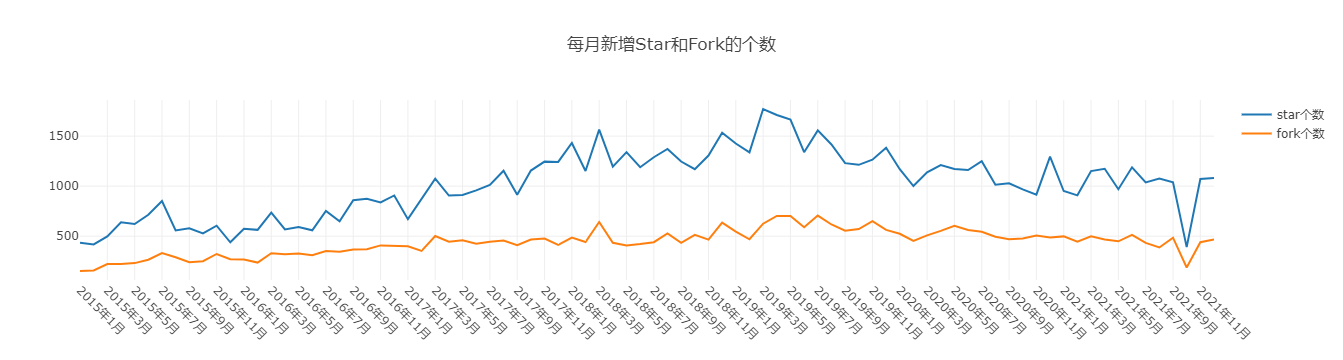

In [34]:
// 1、每月新增Star和Fork的个数
var openDigger = require('../src/open_digger');
var our_repo_id = 20580498;
var startYear = 2015, endYear = 2021;
var years = Array.from({length: endYear - startYear + 1}, (_, i) => i + startYear);
var startMonth = 1, endMonth = 12;
var months = Array.from( {length: endMonth - startMonth + 1}, (_, i) => i + startMonth);

var times = Array();
for(let i = 0; i < years.length; i++) {
    for(let j = 0; j < months.length; j++) times.push({'y': years[i], 'm': months[j]});
}
times_axis = times.map(time => time['y'].toString() + '年' + time['m'].toString()+ '月');

Promise.all(times.map(time =>{
    return openDigger.driver.clickhouse.query(`select count(if(type='WatchEvent', 1, null)) as star,
    count(if(type='ForkEvent', 1, null)) as fork from github_log.events where repo_id=${our_repo_id} and toMonth(created_at)=${time['m']} and toYear(created_at)=${time['y']}`); 
})).then(data => {
    var starCount = [], forkCount = [], tableData = [];
    data.forEach((d, i) => {
        starCount.push(d[0].star);
        forkCount.push(d[0].fork);
        tableData.push({'time': times_axis[i], 'star': starCount[starCount.length-1], 'fork': forkCount[forkCount.length-1]});
    });
    console.table(tableData.map((d) => {
        return {
            '月份': d.time,
            '每月新增star个数': d.star,
            '每月新增fork个数': d.fork,
        };
    }));
    openDigger.render.plotly([
        {x: times_axis, y: starCount, mode: 'scatter', name: 'star个数'},
        {x: times_axis, y: forkCount, mode: 'scatter', name: 'fork个数'},
    ], {
        title: '每月新增Star和Fork的个数',
        xaxis: {type: 'category',tickangle: 45}
    });
})

---

### **2. 每月打开Issue和关闭Issue的个数**

┌─────────┬──────────────┬───────────────────┬───────────────────┐
│ (index) │     月份     │ 每月打开Issue个数 │ 每月关闭Issue个数 │
├─────────┼──────────────┼───────────────────┼───────────────────┤
│    0    │ '2015年1月'  │       '325'       │       '203'       │
│    1    │ '2015年2月'  │       '330'       │       '261'       │
│    2    │ '2015年3月'  │       '465'       │       '432'       │
│    3    │ '2015年4月'  │       '459'       │       '354'       │
│    4    │ '2015年5月'  │       '553'       │       '338'       │
│    5    │ '2015年6月'  │       '617'       │       '452'       │
│    6    │ '2015年7月'  │       '533'       │       '428'       │
│    7    │ '2015年8月'  │       '477'       │       '501'       │
│    8    │ '2015年9月'  │       '563'       │       '354'       │
│    9    │ '2015年10月' │       '628'       │       '490'       │
│   10    │ '2015年11月' │       '545'       │       '321'       │
│   11    │ '2015年12月' │       '498'       │       '327'       │
│   12    │ '2016年1月'  │       '4

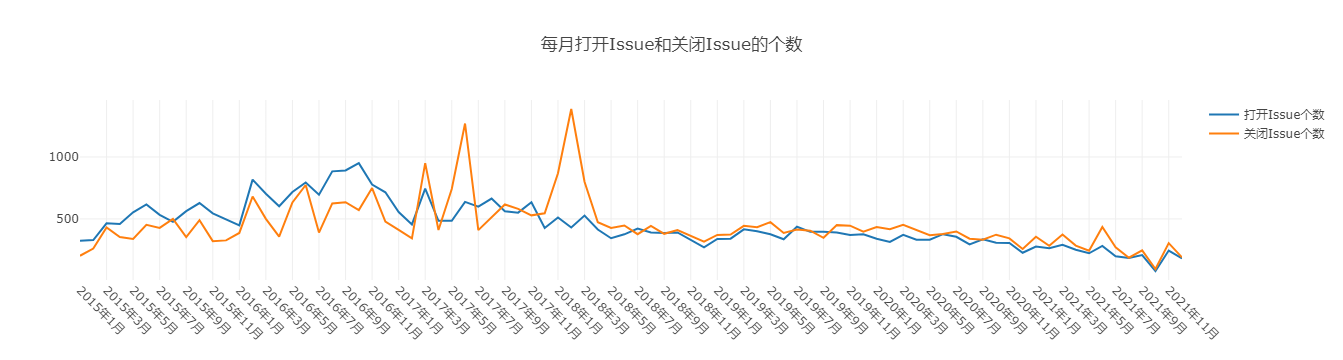

In [16]:
// 2、每月打开Issue和关闭Issue的个数
var openDigger = require('../src/open_digger');
var our_repo_id = 20580498;
var startYear = 2015, endYear = 2021;
var years = Array.from({length: endYear - startYear + 1}, (_, i) => i + startYear);
var startMonth = 1, endMonth = 12;
var months = Array.from( {length: endMonth - startMonth + 1}, (_, i) => i + startMonth);

var times = Array();
for(let i = 0; i < years.length; i++) {
    for(let j = 0; j < months.length; j++) times.push({'y': years[i], 'm': months[j]});
}
times_axis = times.map(time => time['y'].toString() + '年' + time['m'].toString()+ '月');

Promise.all(times.map(time =>{
    return openDigger.driver.clickhouse.query(`select count(if(action='opened', 1, NULL)) as open,
    count(if(action='closed', 1, null)) as close from github_log.events where repo_id=${our_repo_id} and toMonth(created_at)=${time['m']} and toYear(created_at)=${time['y']} and type='IssuesEvent'`); 
})).then(data => {
    var openCount = [], closeCount = [], tableData = [];
    data.forEach((d, i) => {
        openCount.push(d[0].open);
        closeCount.push(d[0].close);
        tableData.push({'time': times_axis[i], 'open': openCount[openCount.length-1], 'close': closeCount[closeCount.length-1]});
    });
    console.table(tableData.map((d) => {
        return {
            '月份': d.time,
            '每月打开Issue个数': d.open,
            '每月关闭Issue个数': d.close,
        };
    }));
    openDigger.render.plotly([
        {x: times_axis, y: openCount, mode: 'scatter', name: '打开Issue个数'},
        {x: times_axis, y: closeCount, mode: 'scatter', name: '关闭Issue个数'},
    ], {
        title: '每月打开Issue和关闭Issue的个数',
        xaxis: {type: 'category',tickangle: 45}
    });
})

---

### **3. 每月打开PR和合入PR的个数**

┌─────────┬──────────────┬────────────────┬────────────────┐
│ (index) │     月份     │ 每月打开PR个数 │ 每月合入PR个数 │
├─────────┼──────────────┼────────────────┼────────────────┤
│    0    │ '2015年1月'  │     '494'      │     '426'      │
│    1    │ '2015年2月'  │     '586'      │     '512'      │
│    2    │ '2015年3月'  │     '861'      │     '774'      │
│    3    │ '2015年4月'  │     '884'      │     '770'      │
│    4    │ '2015年5月'  │     '895'      │     '758'      │
│    5    │ '2015年6月'  │     '922'      │     '759'      │
│    6    │ '2015年7月'  │     '989'      │     '848'      │
│    7    │ '2015年8月'  │     '826'      │     '663'      │
│    8    │ '2015年9月'  │     '904'      │     '698'      │
│    9    │ '2015年10月' │     '1131'     │     '996'      │
│   10    │ '2015年11月' │     '796'      │     '581'      │
│   11    │ '2015年12月' │     '725'      │     '641'      │
│   12    │ '2016年1月'  │     '727'      │     '554'      │
│   13    │ '2016年2月'  │     '1011'     │     '866'      │
│   1

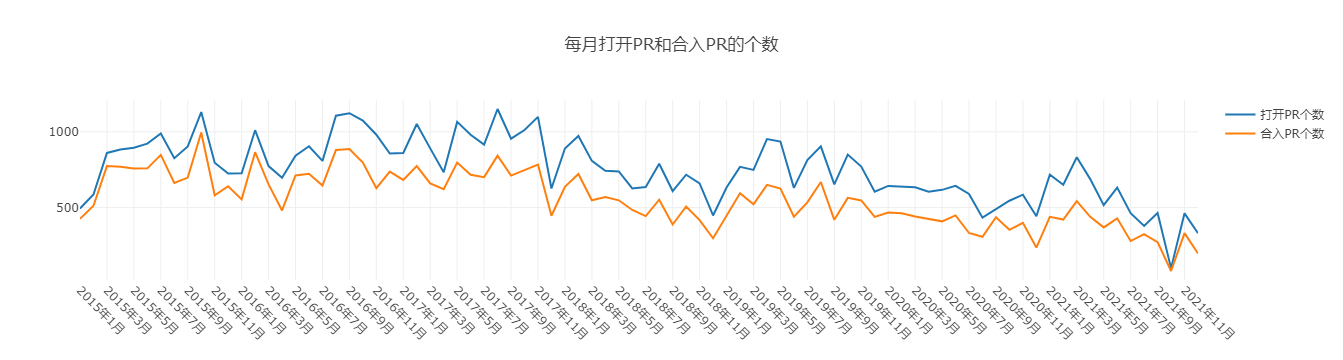

In [17]:
// 3、每月打开PR和合入PR的个数
var openDigger = require('../src/open_digger');
var our_repo_id = 20580498;
var startYear = 2015, endYear = 2021;
var years = Array.from({length: endYear - startYear + 1}, (_, i) => i + startYear);
var startMonth = 1, endMonth = 12;
var months = Array.from( {length: endMonth - startMonth + 1}, (_, i) => i + startMonth);

var times = Array();
for(let i = 0; i < years.length; i++) {
    for(let j = 0; j < months.length; j++) times.push({'y': years[i], 'm': months[j]});
}
times_axis = times.map(time => time['y'].toString() + '年' + time['m'].toString()+ '月');

Promise.all(times.map(time =>{
    return openDigger.driver.clickhouse.query(`select count(if(action='opened', 1, null)) as open,
    count(if(pull_merged=1, 1, null)) as merge from github_log.events where repo_id=${our_repo_id} and toMonth(created_at)=${time['m']} and toYear(created_at)=${time['y']} and type='PullRequestEvent'`); 
})).then(data => {
    var openCount = [], mergeCount = [], tableData = [];
    data.forEach((d, i) => {
        openCount.push(d[0].open);
        mergeCount.push(d[0].merge);
        tableData.push({'time': times_axis[i], 'open': openCount[openCount.length-1], 'merge': mergeCount[mergeCount.length-1]});
    });
    console.table(tableData.map((d) => {
        return {
            '月份': d.time,
            '每月打开PR个数': d.open,
            '每月合入PR个数': d.merge,
        };
    }));
    openDigger.render.plotly([
        {x: times_axis, y: openCount, mode: 'scatter', name: '打开PR个数'},
        {x: times_axis, y: mergeCount, mode: 'scatter', name: '合入PR个数'},
    ], {
        title: '每月打开PR和合入PR的个数',
        xaxis: {type: 'category',tickangle: 45}
    });
})

---

### **4. 每月在仓库中活跃（只要有日志产生就算）的不同开发者总数**

┌─────────┬──────────────┬──────────────────────────────────┐
│ (index) │     月份     │ 每月在仓库中活跃的不同开发者总数 │
├─────────┼──────────────┼──────────────────────────────────┤
│    0    │ '2015年1月'  │              '688'               │
│    1    │ '2015年2月'  │              '687'               │
│    2    │ '2015年3月'  │              '857'               │
│    3    │ '2015年4月'  │              '1070'              │
│    4    │ '2015年5月'  │              '1083'              │
│    5    │ '2015年6月'  │              '1244'              │
│    6    │ '2015年7月'  │              '1461'              │
│    7    │ '2015年8月'  │              '1210'              │
│    8    │ '2015年9月'  │              '1168'              │
│    9    │ '2015年10月' │              '1117'              │
│   10    │ '2015年11月' │              '1286'              │
│   11    │ '2015年12月' │              '1132'              │
│   12    │ '2016年1月'  │              '1241'              │
│   13    │ '2016年2月'  │              '1225'        

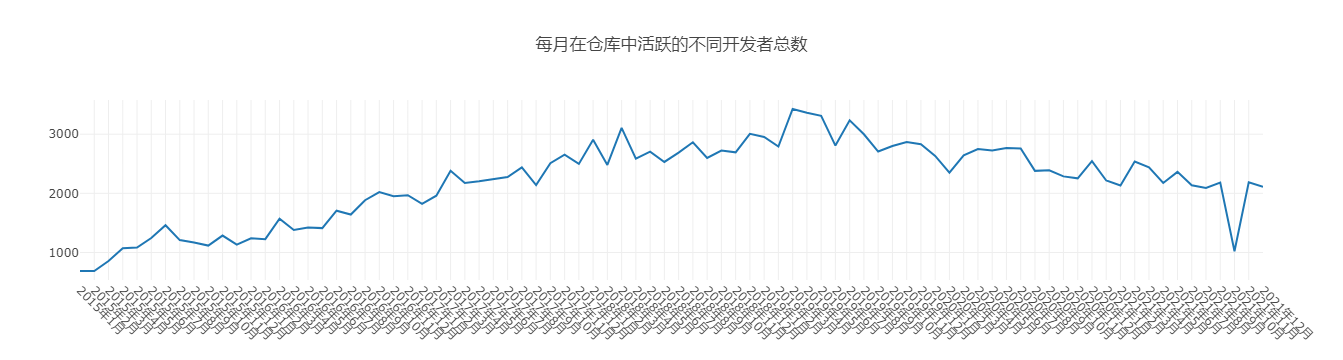

In [21]:
//4、每月在仓库中活跃（只要有日志产生就算）的不同开发者总数
var openDigger = require('../src/open_digger');
var our_repo_id = 20580498;
var startYear = 2015, endYear = 2021;
var years = Array.from({length: endYear - startYear + 1}, (_, i) => i + startYear);
var startMonth = 1, endMonth = 12;
var months = Array.from( {length: endMonth - startMonth + 1}, (_, i) => i + startMonth);

var times = Array();
for(let i = 0; i < years.length; i++) {
    for(let j = 0; j < months.length; j++) times.push({'y': years[i], 'm': months[j]});
}
times_axis = times.map(time => time['y'].toString() + '年' + time['m'].toString()+ '月');

Promise.all(times.map(time =>{
    return openDigger.driver.clickhouse.query(`select count(distinct actor_id) as user
    from github_log.events where repo_id=${our_repo_id} and toMonth(created_at)=${time['m']} and toYear(created_at)=${time['y']}`); 
})).then(data => {
    var userCount = [], tableData = [];
    data.forEach((d, i) => {
        userCount.push(d[0].user);
        tableData.push({'time': times_axis[i], 'user': userCount[userCount.length-1]});
    });
    console.table(tableData.map((d) => {
        return {
            '月份': d.time,
            '每月在仓库中活跃的不同开发者总数': d.user,
        };
    }));
    openDigger.render.plotly([
        {x: times_axis, y: userCount, mode: 'scatter', name: '活跃的不同开发者总数'},
    ], {
        title: '每月在仓库中活跃的不同开发者总数',
        xaxis: {type: 'category',tickangle: 45}
    });
})

---

### **5. Issue从打开到关闭的平均时长和中位数（单位：天）**

In [37]:
//5、Issue从打开到关闭的平均时长和中位数（单位：天）
var openDigger = require('../src/open_digger');
var our_repo_id = 20580498;
var startYear = 2015, endYear = 2021;
var years = Array.from({length: endYear - startYear + 1}, (_, i) => i + startYear);

Promise.all(years.map(y =>{
    return openDigger.driver.clickhouse.query(`select datediff('second', issue_created_at, issue_closed_at)/(60*60*24) as duration
    from github_log.events where repo_id=${our_repo_id} and type='IssuesEvent' and toYear(created_at)=${y} and datediff('day', issue_created_at, issue_closed_at)>0`); 
})).then(data => {
    var durationData = [], ave_duration = 0;
    data.forEach((d, i) => {
        durationData.push(...d);
    });
    durationData.forEach((d, i) => {
        ave_duration += Number(d.duration);
    });
    ave_duration /= durationData.length;
    console.log('Issue从打开到关闭的平均时长（单位：天）:',ave_duration);
    function compare(property) {
        return function(a,b){
            var value1 = a[property];
            var value2 = b[property];
            return value1 - value2;
        }
    }
    durationData = durationData.sort(compare('duration'));
    var mid_site = durationData.length/2, mid_duration;
    if (durationData.length%2 == 0) mid_duration = durationData[mid_site].duration;
    else mid_duration = (durationData[Math.floor(mid_site)].duration + durationData[Math.ceil(mid_site)].duration)/2;
    console.log('Issue从打开到关闭的中位数时长（单位：天）:',mid_duration);
})

Issue从打开到关闭的平均时长（单位：天）: 160.80100185005884
Issue从打开到关闭的中位数时长（单位：天）: 55.25083912037037


---

### **6. PR从打开到合入的平均时长和中位数（单位：天）**

In [36]:
//6、PR从打开到合入的平均时长和中位数（单位：天）
var openDigger = require('../src/open_digger');
var our_repo_id = 20580498;
var startYear = 2015, endYear = 2021;
var years = Array.from({length: endYear - startYear + 1}, (_, i) => i + startYear);

Promise.all(years.map(y =>{
    return openDigger.driver.clickhouse.query(`select datediff('second', issue_created_at, pull_merged_at)/(60*60*24) as duration
    from github_log.events where repo_id=${our_repo_id} and toYear(created_at)=${y} and type='PullRequestEvent' and pull_merged = 1`); 
})).then(data => {
    var durationData = [], ave_duration = 0;
    data.forEach((d, i) => {
        durationData.push(...d);
    });
    durationData.forEach((d, i) => {
        ave_duration += Number(d.duration);
    });
    ave_duration /= durationData.length;
    console.log('PR从打开到合入的平均时长（单位：天）:',ave_duration);
    function compare(property) {
        return function(a,b){
            var value1 = a[property];
            var value2 = b[property];
            return value1 - value2;
        }
    }
    durationData = durationData.sort(compare('duration'));
    var mid_site = durationData.length/2, mid_duration;
    if (durationData.length%2 == 0) mid_duration = durationData[mid_site].duration;
    else mid_duration = (durationData[Math.floor(mid_site)].duration + durationData[Math.ceil(mid_site)].duration)/2;
    console.log('PR从打开到合入的中位数时长（单位：天）:',mid_duration);
})

PR从打开到合入的平均时长（单位：天）: 13.168516324998043
PR从打开到合入的中位数时长（单位：天）: 3.0434780092592595


---

### **7. Issue和PR从打开到第一次有人回复（非本人回复）的平均时长和中位数（单位：天）**

In [38]:
//7、Issue和PR从打开到第一次有人回复（非本人回复）的平均时长和中位数（单位：天）
var openDigger = require('../src/open_digger');
var our_repo_id = 20580498;

openDigger.driver.clickhouse.query(`select datediff('second', min(issue_created_at), min(issue_comment_created_at))/(60*60*24) as duration
    from github_log.events where repo_id=${our_repo_id} and type='IssueCommentEvent' and issue_comment_author_id<>issue_author_id group by issue_id order by duration`
).then(data => {
    var ave_duration = 0;
    data.forEach((d, i) => {
        ave_duration += Number(d.duration);
    });
    ave_duration /= data.length;
    console.log('Issue和PR从打开到第一次有人回复（非本人回复）的平均时长（单位：天）：',ave_duration);
    var mid_site = data.length/2, mid_duration;
    if (data.length%2 == 0) mid_duration = data[mid_site].duration;
    else mid_duration = (data[Math.floor(mid_site)].duration + data[Math.ceil(mid_site)].duration)/2;
    console.log('Issue和PR从打开到第一次有人回复（非本人回复）的中位数时长（单位：天）：',mid_duration);
})

Issue和PR从打开到第一次有人回复（非本人回复）的平均时长（单位：天）： 8.280251515280284
Issue和PR从打开到第一次有人回复（非本人回复）的中位数时长（单位：天）： 0.00019675925925925926
